In [52]:
import urllib
import re
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf

def lin_func(x,m,c):
    y = m*x + c
    return y

def read_data(targ):
    ins = "wfc3-uvis-acs-wfc"
    filt = "multi"
    exteng = "1"

    url = "https://archive.stsci.edu/hlsps/hugs/ngc"+targ+"/hlsp_hugs_hst_"+ins+"_ngc"+targ+"_"+filt+"_v1_catalog-meth"+exteng+".txt"
    file = urllib.request.urlopen(url)   

    ptr = 1
    hd = []

    hd.append("Nan") 
    hd.append("X")  
    hd.append("Y")

    with open(r"D:\IIT material\Krittika python project\NGC"+targ+" data.txt", 'w') as f1, open(r"D:\IIT material\Krittika python project\NGC"+targ+" header.txt", 'w') as f2:
        for line in file:
            line = line.decode("utf-8")
            f2.write(line)
            if ptr > 54:    
                f1.write(re.sub('[\t ]+',' ', line))
            ptr += 1        

    with open(r"D:\IIT material\Krittika python project\NGC"+targ+" header.txt", 'r') as fr:
        lines = fr.readlines()

        for i in range(14, 45):
            hd.append(lines[i])

        hd.append(lines[45])
        hd.append(lines[46])
        hd.append(lines[47])
        hd.append(lines[48])
        hd.append(lines[49])

    file_path = r"D:\IIT material\Krittika python project\NGC"+targ+" data.txt"

    df = pd.read_csv(file_path, sep = ' ')

    df.columns = hd

    df.drop(['Nan'], inplace=True, axis=1)

    df.drop(df[df['# Col. 33: Membership Probability [-1.0: not available]\n'] < 90].index, inplace = True)
    df.drop(df[df['# Col.  3: F275W calibrated magnitude\n'] < 0].index, inplace = True)
    df.drop(df[df['# Col.  9: F336W calibrated magnitude\n'] < 0].index, inplace = True)
    df['Color index'] = df['# Col.  3: F275W calibrated magnitude\n'] - df['# Col.  9: F336W calibrated magnitude\n']
    return df

In [53]:
df = read_data("2808")

In [54]:
def col_mag(targ):
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'ultralight',
            'size': 20,
            }

    x = df['Color index']
    y = df['# Col.  3: F275W calibrated magnitude\n']
    plt.figure(figsize = (15, 15))
    plt.scatter(x, y, s = 0.0005, color = 'black')    
    plt.gca().invert_yaxis()
    plt.title("NGC"+targ, fontsize = 30, y = 1.01, fontdict = font)
    plt.xlabel(r'$m_{F275W} - m_{F336W}$', fontsize = 20, fontdict = font)
    plt.ylabel(r'$m_{F275W}$', fontsize = 20, fontdict = font)
    plt.xlim = (x.min(), x.max())
    plt.ylim = (y.min(), y.max())
    plt.tick_params(labelsize=15, pad = 6)
    plt.show()

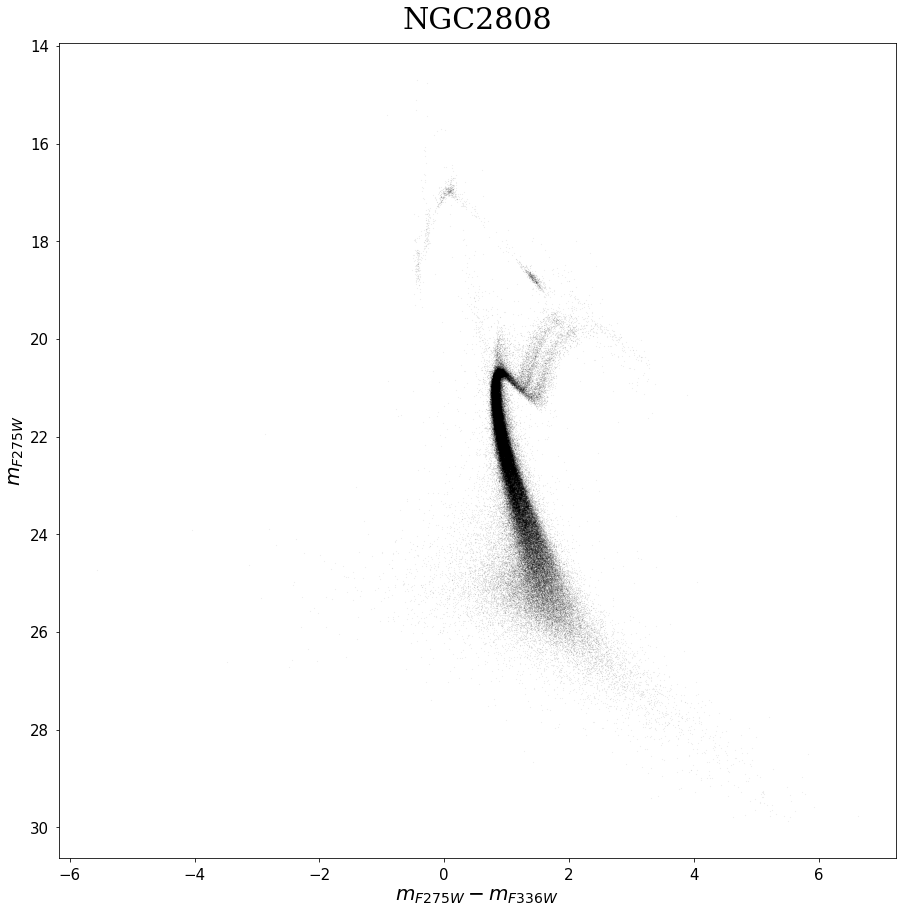

In [55]:
col_mag("2808")

C:\Users\91987\anaconda3\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


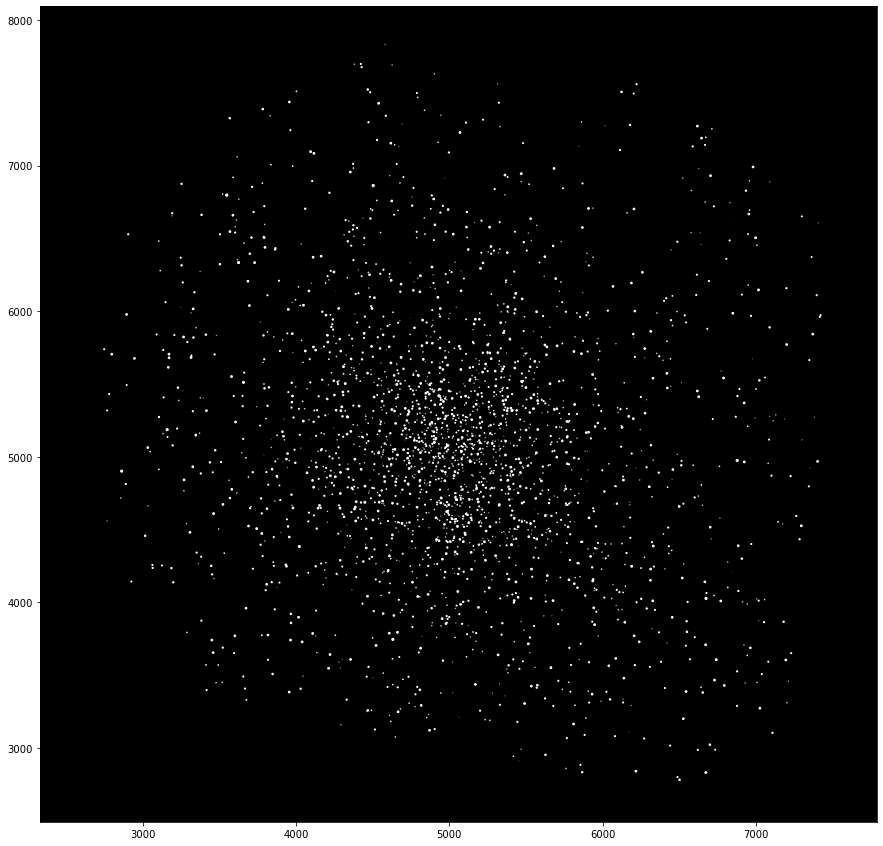

In [56]:
plt.figure(figsize = (15, 15))
plt.scatter(df['X'], df['Y'], s = 20 - df['# Col.  3: F275W calibrated magnitude\n'] ,color='white')
ax = plt.gca()
ax.set_facecolor('black')
plt.show()